In [ ]:
import sklearn.ensemble
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split

try:
  import shap
except:
  !pip install shap
  import shap

In [2]:
#load dataset 
X,y = shap.datasets.boston()

In [3]:
#Split to train test
# 75% train 25% test
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [4]:
#Create a decision tree regressor
#And print the square root mean squared error
from sklearn import tree

model = tree.DecisionTreeRegressor()
model.fit(X_train, y_train)
print("Root mean squared test error = {0}".format(np.sqrt(np.mean((model.predict(X_test) - y_test)**2))))


Root mean squared test error = 5.289165869071529


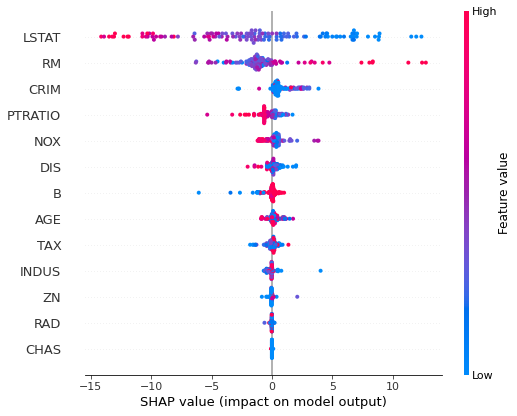

In [5]:
#Global explanation. Feature importance graph
e = shap.TreeExplainer(model)
shap_values = e.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

LSTAT is the most important feature.

When LSTAT value is high(red) then it contributes towards the negative(Negative SHAP value) which means the predicted value of a house is likely to be smaller.

If LSTAT is small(blue) then it contributes towards the positive(Positive SHAP value) which means the predicted value of a house is likely to be higher.
